In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to load and preprocess images
def load_images_from_directory(path, image_size=(30, 30)):
    images = os.listdir(path)
    data = []
    labels = []
    class_id = int(os.path.basename(path))  # Use os.path.basename to get the directory name
    for image_filename in images:
        try:
            image_path = os.path.join(path, image_filename)
            image = Image.open(image_path)
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(class_id)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    return data, labels


In [ ]:
# Retrieving the images and their labels
data = []
labels = []
num_classes = 20  # Updated to reflect 20 classes (0 to 20)
dataset_path = '/content/drive/MyDrive/Dataset/train1'

In [ ]:
# Iterate through each class folder inside 'train1'
for class_id in range(num_classes):
    path = os.path.join(dataset_path, str(class_id))
    if os.path.isdir(path):  # Check if the path is a directory to avoid the Excel file
        print(f"Processing path: {path}")
        class_data, class_labels = load_images_from_directory(path)
        data.extend(class_data)
        labels.extend(class_labels)

Processing path: /content/drive/MyDrive/Dataset/train1/0
Processing path: /content/drive/MyDrive/Dataset/train1/1
Processing path: /content/drive/MyDrive/Dataset/train1/2
Processing path: /content/drive/MyDrive/Dataset/train1/3
Processing path: /content/drive/MyDrive/Dataset/train1/4
Processing path: /content/drive/MyDrive/Dataset/train1/5
Processing path: /content/drive/MyDrive/Dataset/train1/6
Processing path: /content/drive/MyDrive/Dataset/train1/7
Processing path: /content/drive/MyDrive/Dataset/train1/8
Processing path: /content/drive/MyDrive/Dataset/train1/9
Processing path: /content/drive/MyDrive/Dataset/train1/10
Processing path: /content/drive/MyDrive/Dataset/train1/11
Processing path: /content/drive/MyDrive/Dataset/train1/12
Processing path: /content/drive/MyDrive/Dataset/train1/13
Processing path: /content/drive/MyDrive/Dataset/train1/14
Processing path: /content/drive/MyDrive/Dataset/train1/15
Processing path: /content/drive/MyDrive/Dataset/train1/16
Processing path: /conten

In [ ]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(1235, 30, 30, 3) (1235,)


In [ ]:
#Splitting training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(988, 30, 30, 3) (247, 30, 30, 3) (988,) (247,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(labels, num_classes=20)

# If you have a separate test set, apply one-hot encoding to y_test as well
# Assuming `test_labels` is the array containing test labels:
#y_test = to_categorical(test_labels, num_classes=20)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Assuming `data` and `labels` have been prepared from your dataset loading code
# Normalize the pixel values (scale to 0-1) for better model performance
X_train = np.array(data) / 255.0
y_train = to_categorical(labels, num_classes=20)  # One-hot encode the labels

# Check input shape for model; reshape if grayscale
if len(X_train.shape) == 3:
    # Add a channel dimension if images are grayscale
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(20, activation='softmax'))  # Output layer with 20 classes

# Model summary to check architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,340 (923.20 KB)

 Trainable params: 236,340 (923.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

# Save the model
model.save("recognition_model2.h5")

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.0643 - loss: 2.9753 - val_accuracy: 0.1700 - val_loss: 2.6870
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.1613 - loss: 2.5793 - val_accuracy: 0.1417 - val_loss: 2.4463
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.1699 - loss: 2.4258 - val_accuracy: 0.1781 - val_loss: 2.3311
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.1862 - loss: 2.3195 - val_accuracy: 0.4737 - val_loss: 1.8476
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.3937 - loss: 1.8266 - val_accuracy: 0.7247 - val_loss: 0.9255
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.6804 - loss: 1.0383 - val_accuracy: 0.8421 - val_loss: 0.5208
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.7950 - loss: 0.7014 - val_accuracy: 0.8421 - val_loss: 0.4450
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8167 - loss: 0.5980 - val_accuracy: 0.

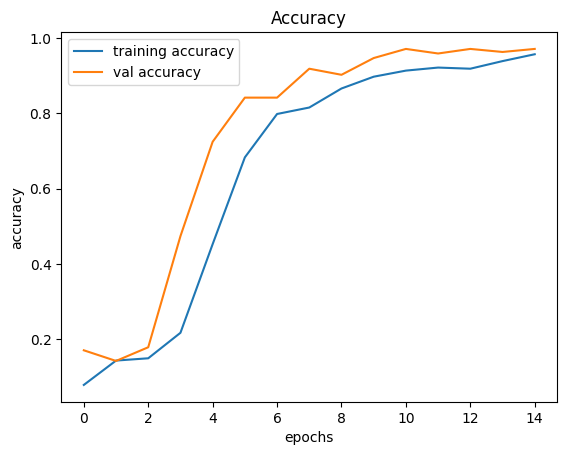

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

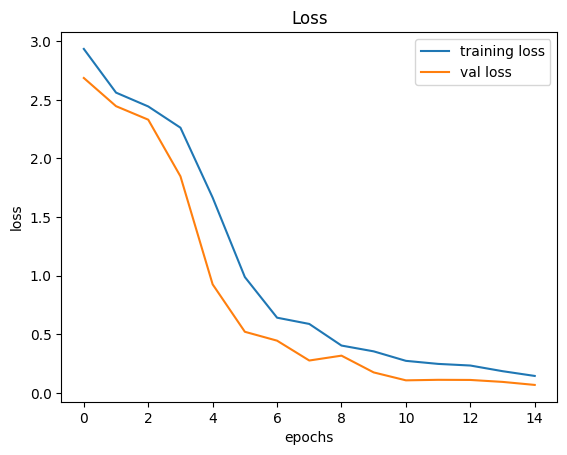

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Enter the name of the image file (located in /content/drive/MyDrive/imageframes): img8.jpg
Enter the x1-coordinate of the top-left corner of the sign: 74
Enter the y1-coordinate of the top-left corner of the sign: 506
Enter the x2-coordinate of the bottom-right corner of the sign: 132
Enter the y2-coordinate of the bottom-right corner of the sign: 588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
The predicted class for the specified region is: Road narrows on left side


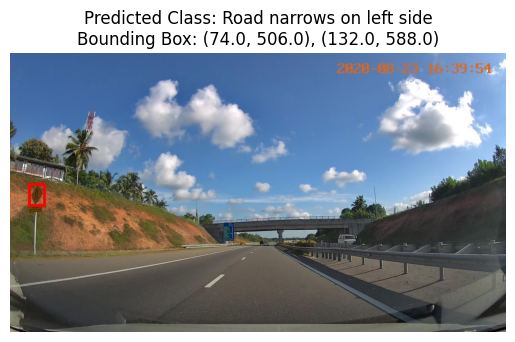

In [ ]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/recognition_model2.h5')
image_size = (30, 30)

# Load class names
def load_class_names(csv_file):
    class_df = pd.read_csv(csv_file)
    class_names = dict(zip(class_df['ClassId'], class_df['Name']))
    return class_names

class_names = load_class_names('/content/drive/MyDrive/Dataset/train1.csv')

# Preprocess the image and crop it to the specified coordinates
def preprocess_image(image_path, coordinates):
    image = Image.open(image_path)

    # Crop the image using the provided coordinates
    x1, y1, x2, y2 = coordinates
    cropped_image = image.crop((x1, y1, x2, y2))

    # Resize the cropped image to match the input size for the model
    cropped_image = cropped_image.resize(image_size)
    cropped_image = np.array(cropped_image) / 255.0

    # Reshape if grayscale or maintain RGB
    if len(cropped_image.shape) == 2:
        cropped_image = cropped_image.reshape(cropped_image.shape[0], cropped_image.shape[1], 1)
    else:
        cropped_image = cropped_image.reshape(cropped_image.shape[0], cropped_image.shape[1], 3)

    # Add batch dimension
    cropped_image = np.expand_dims(cropped_image, axis=0)
    return cropped_image

# Predict the class of the cropped region
def predict_class(image_path, coordinates):
    processed_image = preprocess_image(image_path, coordinates)
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names.get(predicted_class_index, "Unknown Class")
    return predicted_class_name

# Save image path, predicted class, and coordinates to a CSV file
def save_prediction_to_csv(image_path, predicted_class_name, x1, y1, x2, y2, file_path='recognition_predictions1.csv'):
    # Check if file exists to determine if we need headers
    file_exists = os.path.isfile(file_path)

    # Append data as a new row
    with open(file_path, 'a') as file:
        if not file_exists:
            # Write headers with specified column names if the file does not exist
            file.write("Image Path,Predicted Class,x1,y1,x2,y2\n")
        file.write(f"{image_path},{predicted_class_name},{x1},{y1},{x2},{y2}\n")

# Display the image with the predicted class and coordinates
def display_image(image_path, predicted_class_name, coordinates):
    image = Image.open(image_path)
    x1, y1, x2, y2 = coordinates
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none'))

    # Annotate the image with the coordinates and predicted class
    plt.title(f"Predicted Class: {predicted_class_name}\n"
              f"Bounding Box: ({x1}, {y1}), ({x2}, {y2})")

    plt.axis('off')
    plt.show()

def main():
    image_folder_path = '/content/drive/MyDrive/imageframes'
    image_name = input(f"Enter the name of the image file (located in {image_folder_path}): ")
    image_path = os.path.join(image_folder_path, image_name)

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Error: The image path '{image_path}' does not exist.")
        return

    # Get bounding box coordinates from the user
    x1 = float(input("Enter the x1-coordinate of the top-left corner of the sign: "))
    y1 = float(input("Enter the y1-coordinate of the top-left corner of the sign: "))
    x2 = float(input("Enter the x2-coordinate of the bottom-right corner of the sign: "))
    y2 = float(input("Enter the y2-coordinate of the bottom-right corner of the sign: "))
    coordinates = (x1, y1, x2, y2)

    # Predict and display the result
    predicted_class_name = predict_class(image_path, coordinates)
    print(f"The predicted class for the specified region is: {predicted_class_name}")

    # Save the result to a CSV file, including coordinates
    save_prediction_to_csv(image_path, predicted_class_name, x1, y1, x2, y2)

    # Display the image with bounding box and class name
    display_image(image_path, predicted_class_name, coordinates)

if __name__ == "__main__":
    main()
